# Featurization, Model Selection and Tuning

# Data Description:

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

# Domain:
Cement manufacturing

# Context:
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

# Attribute Information:

    Cement : measured in kg in a m3 mixture
    Blast : measured in kg in a m3 mixture
    Fly ash : measured in kg in a m3 mixture
    Water : measured in kg in a m3 mixture
    Superplasticizer : measured in kg in a m3 mixture
    Coarse Aggregate : measured in kg in a m3 mixture
    Fine Aggregate : measured in kg in a m3 mixture
    Age : day (1~365)
    Concrete compressive strength measured in MPa

# Learning Outcomes:

    Exploratory Data Analysis
    Building ML models for regression
    Hyper parameter tuning


# Objective:
Modeling of strength of high performance concrete using Machine Learning

# Steps and tasks:

1. Deliverable -1 (Exploratory data quality report reflecting the following)(20 marks)

    a. Univariate analysis (5 marks)

        i. Univariate analysis – data types and description of the independent attributes which should include (name meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of        the body of distributions / tails, missing values, outliers

    b. Multivariate analysis (5 marks)

        i. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes

    c. Pick one strategy to address the presence outliers and missing
    values and perform necessary imputation (10 marks)
    

2. Deliverable -2 (Feature Engineering techniques) (15 marks)

    a. Identify opportunities (if any) to create a composite feature, drop a
    feature etc. (5 marks)

    b. Decide on complexity of the model, should it be simple linear
    model in terms of parameters or would a quadratic or higher
    degree help (5 marks)

    c. Explore for gaussians. If data is likely to be a mix of gaussians,
    explore individual clusters and present your findings in terms of the
    independent attributes and their suitability to predict strength (5
    marks)
    

3. Deliverable -3 (create the model ) ( 15 marks)

    a. Obtain feature importance for the individual features and present your findings


4. Deliverable -4 (Tuning the model) (20 marks)

    a. Algorithms that you think will be suitable for this project (5 marks)

    b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit (5 marks)

    c. Model performance range at 95% confidence level (10 marks)

# References:

Medium article on hyper parameter tuning:https://medium.com/fintechexplained/how-to-fine-tune-your-machine-learning-models-to-improve-forecasting-accuracy-e18e67e58898

## Import the libraries

In [1]:
    #For numerical libraries
import numpy as np
    #To handle data in the form of rows and columns
import pandas as pd
    #importing seaborn for statistical plots
import seaborn as sns
    #importing ploting libraries
import matplotlib    
import matplotlib.pyplot as plt
    #styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
    #To enable plotting graphs in Jupyter notebook
%matplotlib inline
    #importing the feature scaling library
from sklearn.preprocessing import StandardScaler
    #Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
    # Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
    # Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
    # Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
    # Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
    # Import support vector regressor machine learning library
from sklearn.svm import SVR
    #Import the metrics
from sklearn import metrics
    #Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
    # Import stats from scipy
from scipy import stats
    # Import zscore for scaling
from scipy.stats import zscore
    #importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
    #importing the K fold
from sklearn.model_selection import KFold
    #importing the cross validation score
from sklearn.model_selection import cross_val_score
    #importing the preprocessing library
from sklearn import preprocessing
    # importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
    #importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample

## Load the dataset

In [2]:
#reading the CSV file into pandas dataframe
concrete_df=pd.read_csv('concrete.csv')

In [3]:
#Creating copy of original dataset
concrete_df1=concrete_df.copy()

In [4]:
#Check top few records of the dataset
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
#Check the last few records of the dataset
concrete_df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [6]:
#Check the data types of all columns in the dataset
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

* It shows that there are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).
* All the records are numeric.

# 1. Exploratory data quality report

**a. Univariate analysis**

In [7]:
#To show the detailed summary 
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


* It gives the details about the number of rows (1030), number of columns (9), data types information i.e. except age which is integer type all other columns are float type. Memory usage is 72.5 KB. Also,there are no null values in the data.

In [8]:
#To get the shape 
concrete_df.shape

(1030, 9)

* It gives the details of the number of rows and columns present in the dataset.There are 1030 rows and 9 columns.

In [9]:
#To get the columns names
concrete_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [10]:
#Analyze the distribution of the dataset 
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


* It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataset.
* We can see that cement,slag,ash are left skewed.

**Range of values observed**

In [11]:
Max = concrete_df.max()
Min = concrete_df.min()
Range = Max - Min
print("**Range of Values:**")
print(Range)

**Range of Values:**
cement          438.00
slag            359.40
ash             200.10
water           125.20
superplastic     32.20
coarseagg       344.00
fineagg         398.60
age             364.00
strength         80.27
dtype: float64


**Central values** are the mean and median (50%) in the destriptive statistics table above

**Quartile values** are 15% and 75% in the destriptive statistics table above

**Inter Quartile Range (IQR)**

In [12]:
Q1 = concrete_df.quantile(0.25)
Q3 = concrete_df.quantile(0.75)
IQR = Q3 - Q1
print("**Inter Quartile Range (IQR):**")
print(IQR)

**Inter Quartile Range (IQR):**
cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


In [13]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('**[Name, Lower outlier mark, Upper outlier mark]**')
print((np.column_stack((concrete_df.columns, L_outliers, U_outliers))))

**[Name, Lower outlier mark, Upper outlier mark]**
[['cement' -44.0625 586.4375]
 ['slag' -214.42499999999998 357.375]
 ['ash' -177.45 295.75]
 ['water' 124.25000000000001 232.64999999999998]
 ['superplastic' -15.299999999999999 25.5]
 ['coarseagg' 785.8999999999999 1175.5000000000002]
 ['fineagg' 591.3749999999998 963.575]
 ['age' -66.5 129.5]
 ['strength' -9.927500000000013 79.77250000000001]]


In [14]:
#Outliers = [[concrete_df.columns[i],L_outliers[i], U_outliers[i]] for i in range(len(U_outliers))]
#print(Outliers)

params = {'axes.titlesize':'50',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
plt.tight_layout()
concrete_df.hist( bins=20,figsize=(60,40));

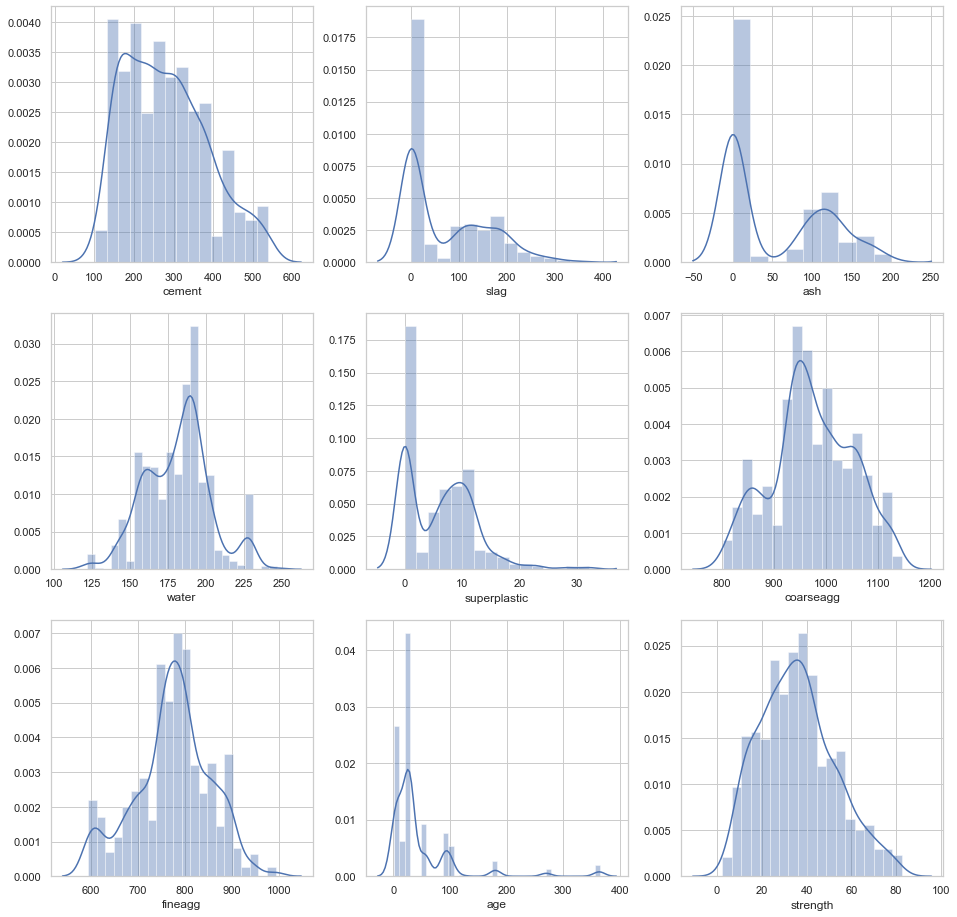

In [15]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(concrete_df['cement'],ax=ax2[0][0])
sns.distplot(concrete_df['slag'],ax=ax2[0][1])
sns.distplot(concrete_df['ash'],ax=ax2[0][2])
sns.distplot(concrete_df['water'],ax=ax2[1][0])
sns.distplot(concrete_df['superplastic'],ax=ax2[1][1])
sns.distplot(concrete_df['coarseagg'],ax=ax2[1][2])
sns.distplot(concrete_df['fineagg'],ax=ax2[2][0])
sns.distplot(concrete_df['age'],ax=ax2[2][1])
sns.distplot(concrete_df['strength'],ax=ax2[2][2]);

 We can see observe that :
- cement is almost normal. 
- slag has  two gausssians and rightly skewed, it shows the presence of outliers.
- ash has two gaussians and rightly skewed, it shows the presence of outliers.
- water has three guassians and slighly left skewed,it shows the presence of outliers.
- superplastic has two gaussians and rightly skewed, it shows the presence of outliers.
- coarseagg has three guassians and almost normal.
- fineagg has almost two guassians and looks like normal.
- age has multiple guassians and rightly skewed, it shows the presence of outliers.
- strength is almost normal.

**b. Multivariate analysis**

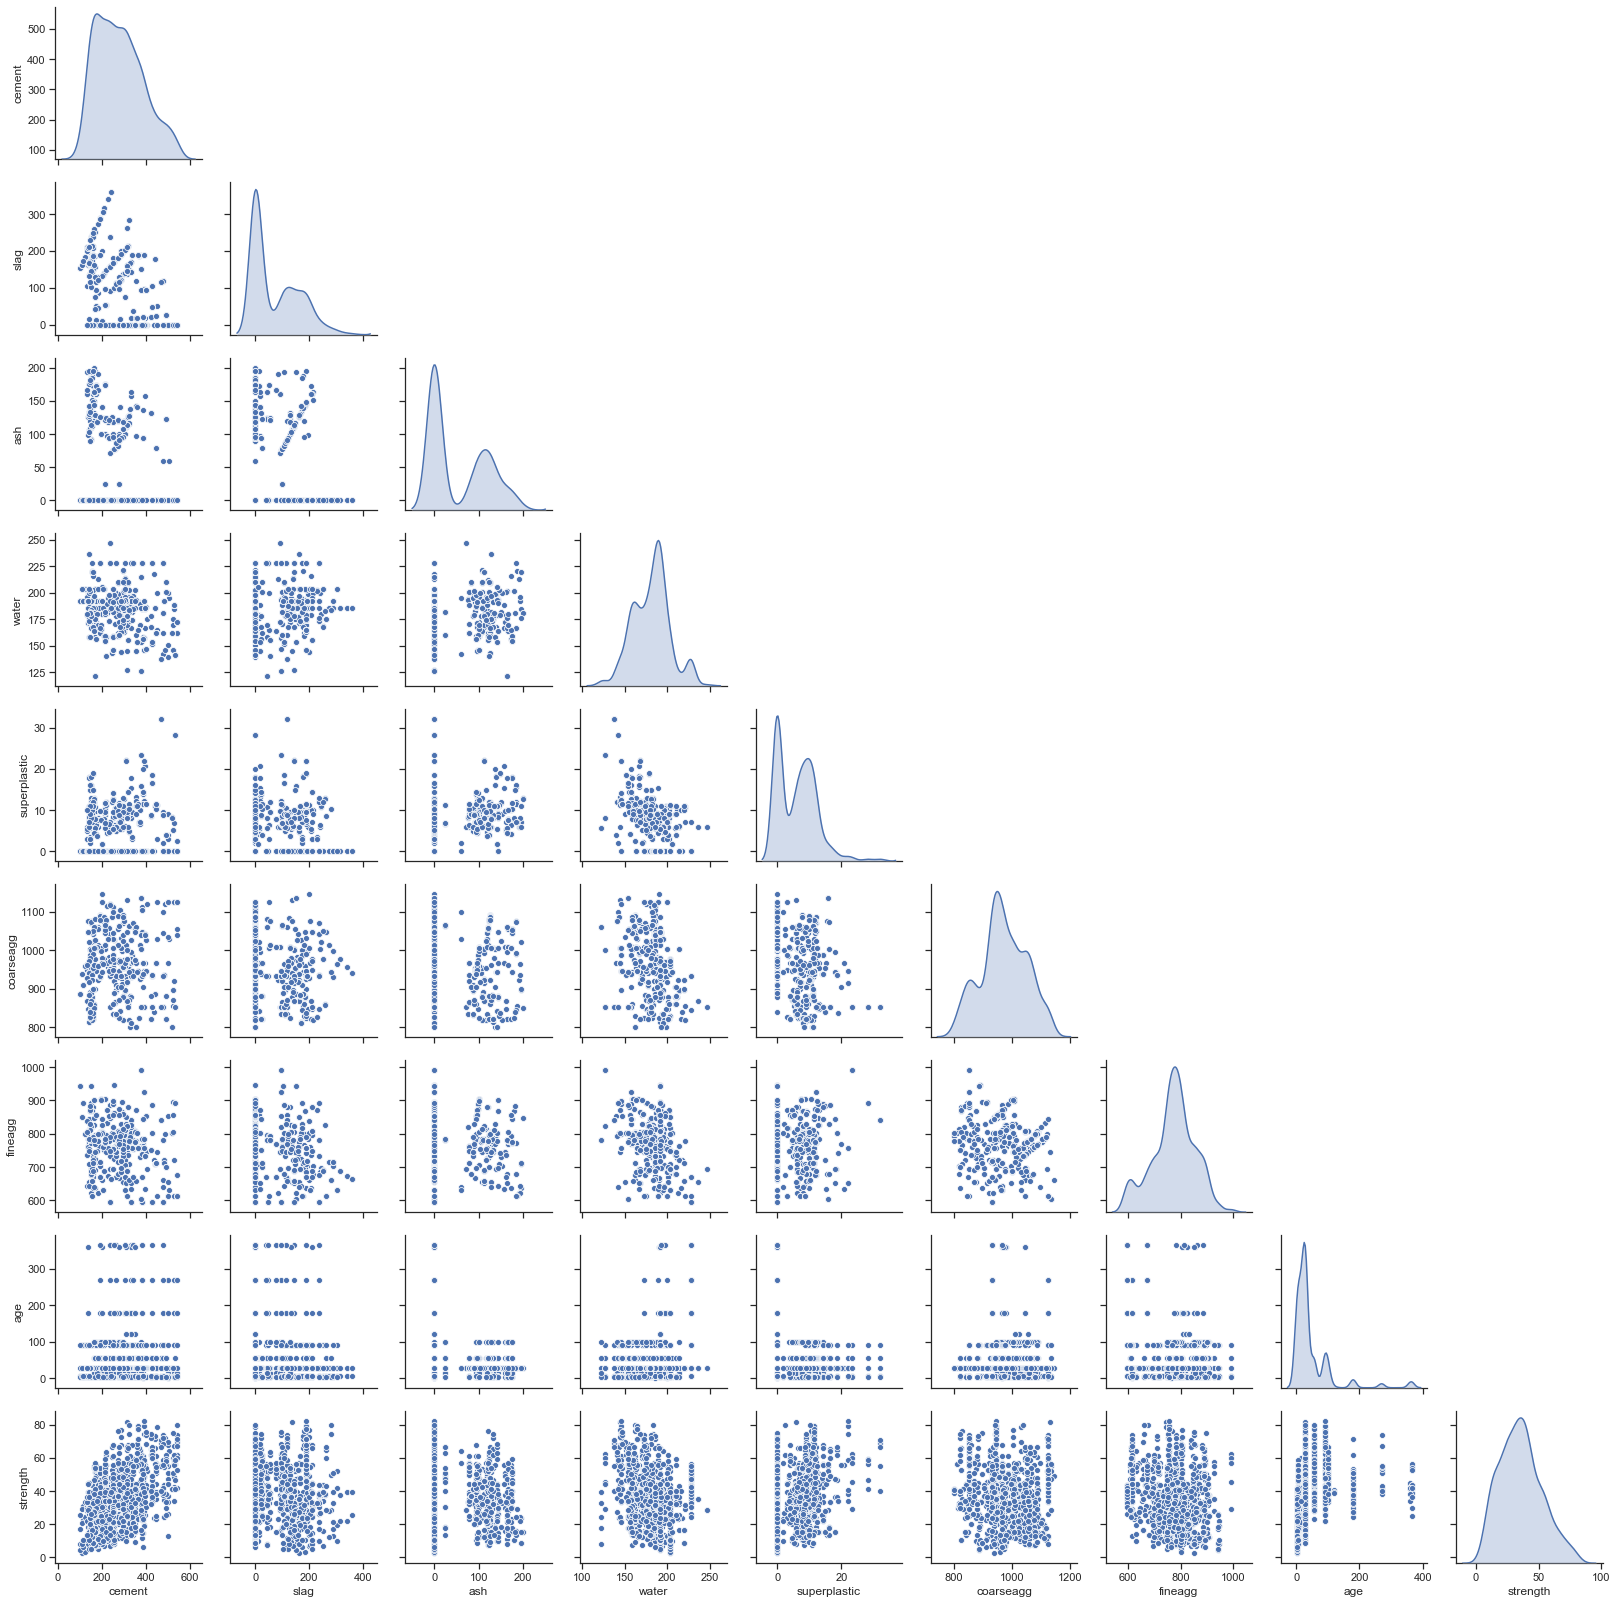

In [16]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(concrete_df, diag_kind="kde");
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

**Diagonals Analysis**
The diagonal gives the same information as distplots above. We have outliers problem in the dataset.

**Off Diagonal Analysis: Relationship between indpendent attributes**
**Scatter plots**
- cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true  as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
- superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.
- coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

The reason why we are doing all this analysis is if we find any kind of dimensions which are very strongly correlated i.e. r value close to 1 or -1 such dimensions are giving same information to your algorithms, its a redundant dimension. So in such cases we may want to keep one and drop the other which we should keep and which we should drop depends on again your domain expertise, which one of the dimension is more prone to errors.I would like to drop that dimension. Or we have a choice to combine these dimensions and create a composite dimension out of it.

**Relationship between dependent and independent attributes**

Strength attribute shows very vital information.
- strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor.
- strength vs slag: There is no particular trend.
- strength vs slag: There is also no particular trend.
- strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor.
- strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor.
- Other attributes does not give any strong relationship with strength.

Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

So, we will not use Linear model

In [17]:
# corrlation matrix 
cor=concrete_df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


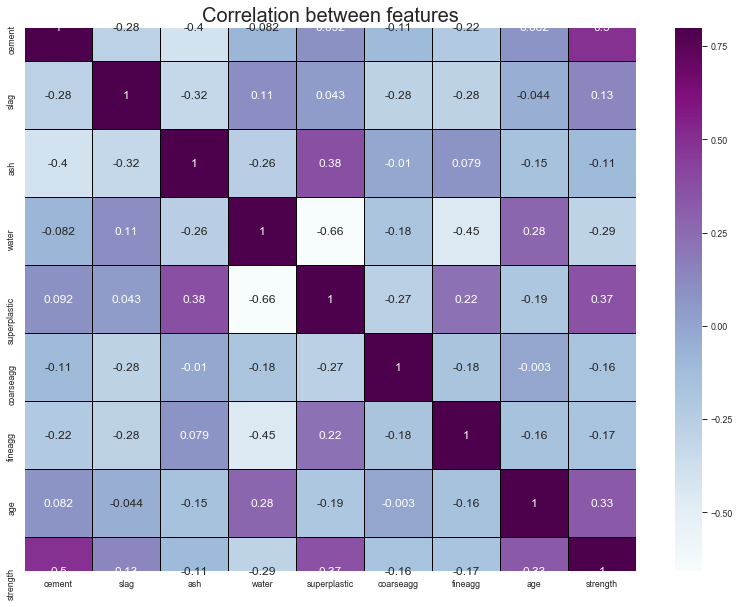

In [18]:
#heatmap
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":20})
sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")
plt.title('Correlation between features');

* Heatmap also giving the same information as pairplot analysis. 
* water shows significant negative relationship with superplastic and fineagg. It also shows some kind of positive relationship with slag and age.

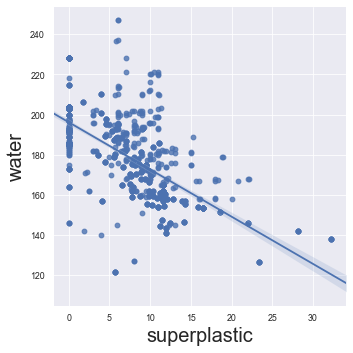

In [19]:
# water vs superplastic
#lm plot
sns.set_context("paper", rc={"axes.labelsize":20})
sns.lmplot(x="superplastic",y="water",data=concrete_df)
plt.show()

**c. Pick one strategy to address the presence outliers and missing
values and perform necessary imputation**

**Finding Ouliers in the data set**

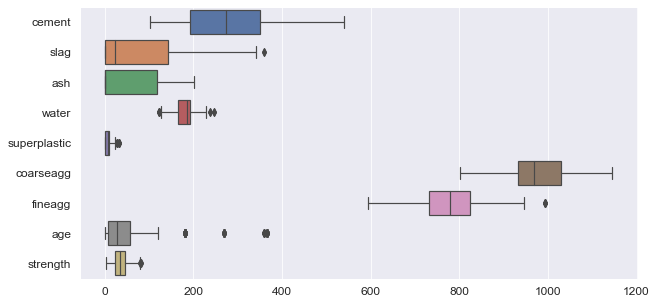

In [20]:
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":35,"axes.labelsize":35})
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=concrete_df, orient="h")
ax.tick_params(labelsize=12)

* There are ooutliers in slag, water, superplastic, fineagg and age

In [21]:
#Number of outliers present in the dataset
print('Number of outliers in cement: ',concrete_df1[((concrete_df1.cement - concrete_df1.cement.mean()) / concrete_df1.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',concrete_df1[((concrete_df1.ash - concrete_df1.ash.mean()) / concrete_df1.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',concrete_df1[((concrete_df1.coarseagg - concrete_df1.coarseagg.mean()) / concrete_df1.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',concrete_df1[((concrete_df1.fineagg - concrete_df1.fineagg.mean()) / concrete_df1.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


* Here, we have used Standard deviation method to detect the outliers.If we have any data point that is more than 3 times the standard deviation, then those points are very likely to be outliers.
* We can see that slag, water, superplastic and age contain outliers.



In [22]:
# To remove all rows of outliers
#concrete_df1 = concrete_df1[~((concrete_df1 < (Q1 - 1.5 * IQR)) |(concrete_df1 > (Q3 + 1.5 * IQR))).any(axis=1)] 

In [23]:
#Replacing the outliers by median
for col_name in concrete_df1.columns[:-1]:
    q1 = concrete_df1[col_name].quantile(0.25)
    q3 = concrete_df1[col_name].quantile(0.75)
    iqr = q3 - q1
        
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete_df1.loc[(concrete_df1[col_name] < low) | (concrete_df1[col_name] > high), col_name] = concrete_df1[col_name].median()
concrete_df1.shape

(1030, 9)

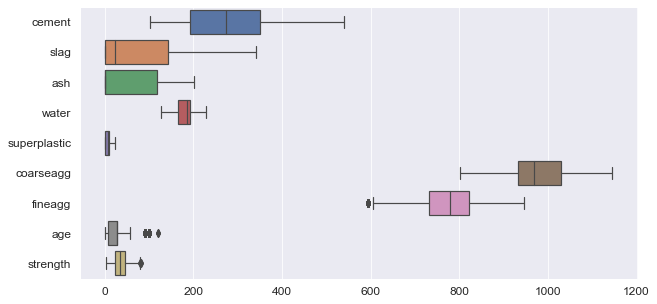

In [24]:
# again check for outliers in dataset using boxplot
sns.set_context("paper", rc={"font.size":25,"axes.titlesize":35,"axes.labelsize":35})
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=concrete_df1, orient="h")
ax.tick_params(labelsize=12)

**Finding missing values**

In [25]:
print("Original null value count:", concrete_df1.isnull().sum())

Original null value count: cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


* No missing values in the data set

# 2. Feature Engineering techniques

**a. Identify opportunities (if any) to create a composite feature, drop a feature etc.**

There is no strong correlation between features to drop or to create composite feature

**b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help**

Based on the pair plot, we noticed there is a no linear relationship between the variables. So, we will not use Linear model.


**c. Explore for gaussians. If data is likely to be a mix of gaussians,explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength.**

From the univariate kde plots

- cement is almost normal. 
- slag has  two gausssians.
- ash has two gaussians.
- water has three guassians.
- superplastic has two gaussians.
- coarseagg has three guassians.
- fineagg has almost two guassians.
- age has multiple guassians.
- strength is almost normal.

# 3. Create the model

In [26]:
#Scaling the dataset
concrete_df_z = concrete_df1.apply(zscore)
concrete_df_z=pd.DataFrame(concrete_df_z,columns=concrete_df.columns)

In [27]:
#independent and dependent variables
X = concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]

In [28]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

## DecisionTree Regression

In [29]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

## a. Obtain feature importance for the individual features and present your findings

In [30]:
#printing the feature importance
print('Feature importances:')
print(pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances:
                   Imp
cement        0.350133
slag          0.095235
ash           0.012190
water         0.127995
superplastic  0.020428
coarseagg     0.032599
fineagg       0.032867
age           0.328552


* cement, age and water are significant attributes.
* ash, coarseagg, fineagg, superplastic and slag are the less significant variables. These will impact less to the strength column. This we have seen in pairplot also.

In [31]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9917907393004437
Performance on testing data using DT: 0.8432258525418994
Accuracy DT:  0.8432258525418994
MSE:  0.16365029156390185


* There is a overfitting of the model as the dataset is performing 99.2% accurately in trainnig data and 84.3% accurately on the testing dataset.

In [32]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.843226


# 4. Tuning the model

## K fold cross validation

In [33]:
kfold = KFold(n_splits=10, random_state=77)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8601958368041578
Standard Deviation:  0.03721177161075286


In [34]:
results.loc[2] = ['Decision Tree k fold', accuracy]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196


## Drop the least significant variable¶

In [35]:
#Create a copy of the dataset
concrete_df2=concrete_df_z.copy()

In [36]:
#independent and dependent variable
X = concrete_df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [37]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [38]:
#printing the feature importance
print('Feature importances:')
print(pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances:
                   Imp
cement        0.369143
slag          0.106220
water         0.161574
superplastic  0.033916
age           0.329148


In [39]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.991045963372976
Performance on testing data using DT: 0.8427277002585769
Accuracy DT:  0.8427277002585768


* The acuracy on testing dataset is not improved, still it is an overfit model.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


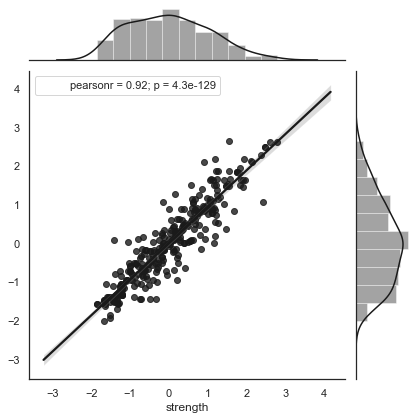

In [40]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [41]:
results.loc[3] = ['Decision Tree 2', acc_DT]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728


## Regularising/Pruning of Decision Tree

In [42]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [43]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [44]:
#printing the feature importance
print('Feature importances:')
print(pd.DataFrame(reg_dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances:
                   Imp
cement        0.416953
slag          0.025822
ash           0.000000
water         0.135128
superplastic  0.017987
coarseagg     0.000000
fineagg       0.007793
age           0.396318


ash,coarseagg and fineagg are least significant variable.

### Visualizing the Regularized Tree

In [45]:
from sklearn.tree import export_graphviz
from graphviz import Source
bank_df=concrete_df_z
xvar = bank_df.drop('strength', axis=1)
feature_cols = xvar.columns

In [46]:
import matplotlib.image as mpimg
import io
from graphviz import render

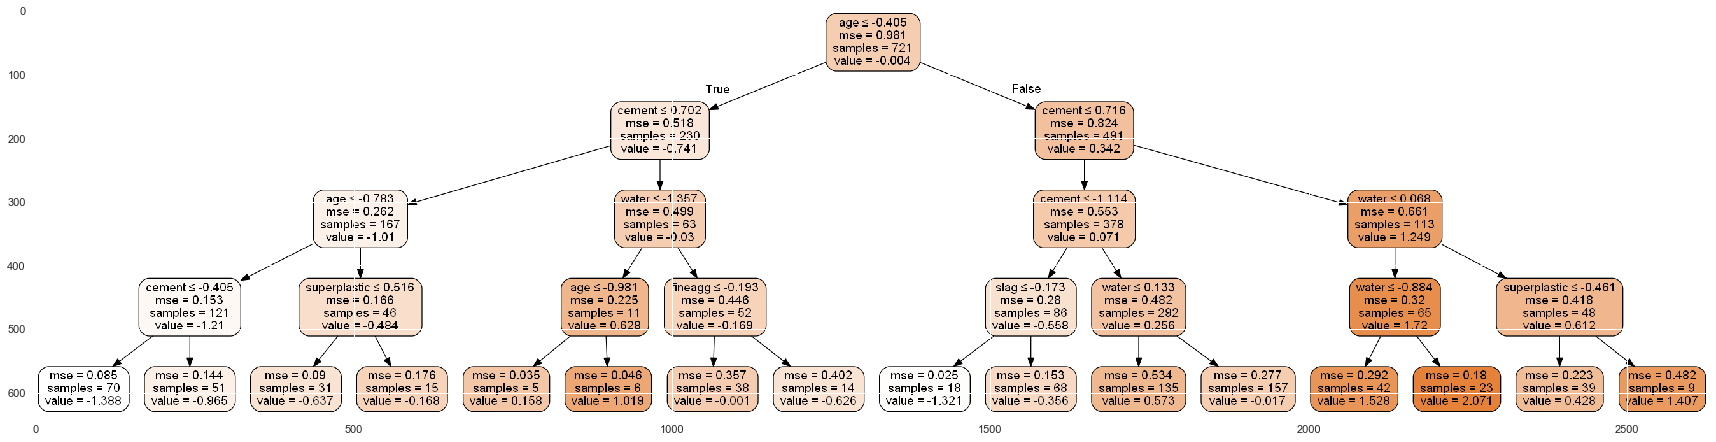

In [47]:
data=export_graphviz(reg_dt_model, out_file= "tree1.dot",  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = Source(data)
#graph
render('dot', 'png', 'tree1.dot')# Convert a .dot file to .png
filename = "tree1.dot.png"
plt.figure(figsize=(30,30))
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show()

In [48]:
#This shows graph without # in front of graphviz.Source(dot_graph)
export_graphviz(reg_dt_model, out_file= "tree2.dot")
graph = Source(data)
with open("tree2.dot") as f:
    dot_graph = f.read()
#graphviz.Source(dot_graph)

In [49]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7255811799299218
Performance on testing data using DT: 0.6548277186105129
Accuracy DT:  0.6548277186105129
MSE:  0.36031160369896825


In [50]:
results.loc[4] = ['Pruned Decision Tree', acc_RDT]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828


### K fold cross validation

In [51]:
kfold = KFold(n_splits=10, random_state=77)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6819101662123233
Standard Deviation:  0.06252311979215476


In [52]:
results.loc[5] = ['Pruned Decision Tree k fold', accuracy]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910


### Iteration2

In [53]:
#Create a copy of the dataset
concrete_df3=concrete_df_z.copy()

In [54]:
#independent and dependent variable
X = concrete_df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [55]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [56]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7249584363084667
Performance on testing data using DT: 0.6634677033758938
Accuracy DT:  0.6634677033758938
MSE:  0.35129266754854116


In [57]:
results.loc[6] = ['Pruned Decision Tree 2', acc_RDT]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468


### K Means Clustering

In [58]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete_df1)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3.709976e+07
1,2,2.774842e+07
2,3,2.141117e+07
3,4,1.868320e+07
4,5,1.657293e+07
5,6,1.503059e+07
6,7,1.348691e+07
7,8,1.233793e+07
8,9,1.132643e+07
9,10,1.058708e+07


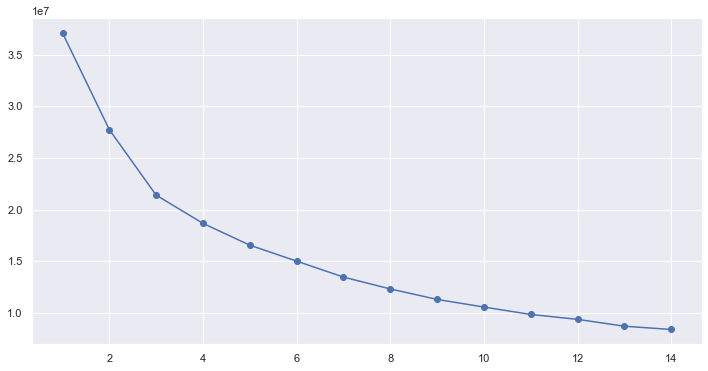

In [59]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [60]:
# k=6
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(concrete_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [61]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(concrete_df_z)
concrete_df_z["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
concrete_df_z_copy = concrete_df_z.copy(deep = True)  

In [62]:
centroids = cluster.cluster_centers_
centroids

array([[-0.52847035,  0.25047012,  1.10117943,  0.4707871 ,  0.51065443,
        -1.14464266, -0.34207299, -0.2243148 , -0.27815339],
       [-0.60282287, -0.65663952,  1.10691052, -0.61327163,  0.49168022,
         0.62337539,  0.43508059,  0.27502291, -0.13528454],
       [ 0.3112026 , -0.83641215, -0.78154411,  0.44337009, -1.00073639,
         0.49854218,  0.39671798, -0.24628184, -0.68238245],
       [-0.87010755,  1.41482728, -0.84485042,  0.60549346, -0.75810292,
        -0.0430217 , -0.16744124, -0.16350135, -0.56135812],
       [ 1.00454194,  0.50203623, -0.51368191, -1.01583295,  1.02698603,
        -0.6014763 ,  0.15987254,  0.07455196,  1.1935206 ],
       [ 1.45045591, -0.42924132, -0.69489669,  1.30649175, -1.00149369,
         0.19438938, -1.65956143,  0.15842921,  0.70494449]])

In [63]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete_df1) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.528470,0.250470,1.101179,0.470787,0.510654,-1.144643,-0.342073,-0.224315,-0.278153
1,-0.602823,-0.656640,1.106911,-0.613272,0.491680,0.623375,0.435081,0.275023,-0.135285
2,0.311203,-0.836412,-0.781544,0.443370,-1.000736,0.498542,0.396718,-0.246282,-0.682382
3,-0.870108,1.414827,-0.844850,0.605493,-0.758103,-0.043022,-0.167441,-0.163501,-0.561358
4,1.004542,0.502036,-0.513682,-1.015833,1.026986,-0.601476,0.159873,0.074552,1.193521
5,1.450456,-0.429241,-0.694897,1.306492,-1.001494,0.194389,-1.659561,0.158429,0.704944


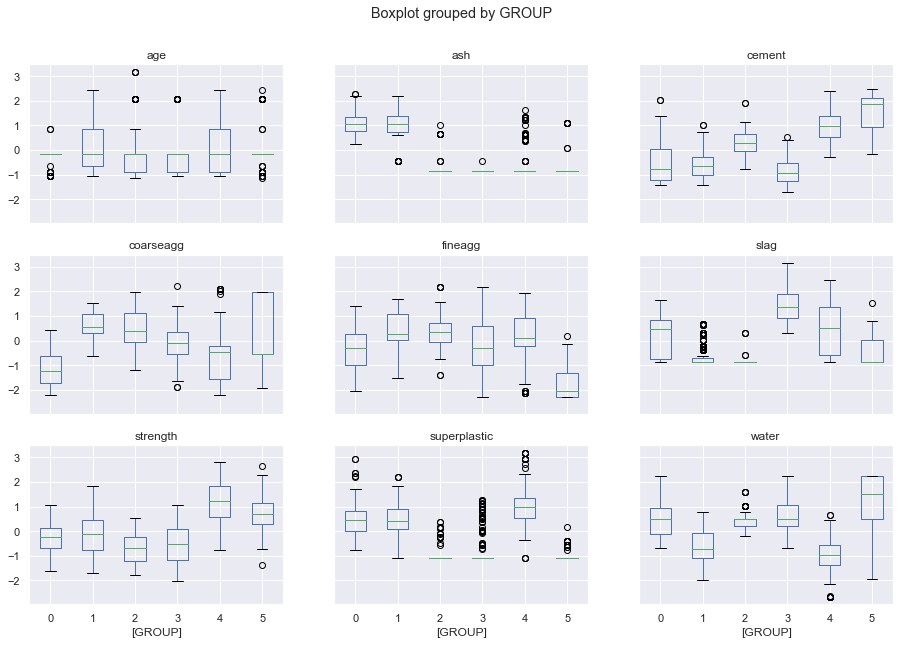

In [64]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
#import matplotlib.pylab as plt
concrete_df_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10));

* Here, None of the dimensions are good predictor of target variable.
* For all the dimensions (variables) every cluster have a similar range of values except in one case.
* We can see that the body of the cluster are overlapping.
* So in k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.

In [65]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

## Random Forest Regressor

In [66]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [67]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9712074872738563
Performance on testing data using RFR: 0.8874689734042057
Accuracy DT:  0.8874689734042057
MSE:  0.11746665895477901


* This model is also overfit.

In [68]:
results.loc[7] = ['Random Forest Regressor', acc_RFR]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.887469


### K fold cross validation

In [69]:
kfold = KFold(n_splits=10, random_state=77)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9018527666339351
Standard Deviation:  0.01965921753400953


In [70]:
results.loc[8] = ['Random Forest Regressor k fold', accuracy]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.887469
8,Random Forest Regressor k fold,0.901853


## Gradient Boosting Regressor

In [71]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9430469892492805
Performance on testing data using GBR: 0.8927511113763785
Accuracy DT:  0.8927511113763786
MSE:  0.11195284540042443


In [73]:
results.loc[9] = ['Gradient Boost Regres', acc_GBR]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.887469
8,Random Forest Regressor k fold,0.901853
9,Gradient Boost Regres,0.892751


### K fold cross validation

In [74]:
kfold = KFold(n_splits=10, random_state=77)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8992826518875452
Standard Deviation:  0.016925684382269837


In [75]:
results.loc[10] = ['Gradient Boost Regres k fold', accuracy]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.887469
8,Random Forest Regressor k fold,0.901853
9,Gradient Boost Regres,0.892751
10,Gradient Boost Regres k fold,0.899283


## Ada Boosting Regressor

In [76]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [77]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using ABR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ABR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ABR: 0.8039885367808028
Performance on testing data using ABR: 0.757669536301975
Accuracy DT:  0.757669536301975
MSE:  0.25295912420506816


In [78]:
results.loc[11] = ['Ada Boosting Regressor', acc_ABR]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.887469
8,Random Forest Regressor k fold,0.901853
9,Gradient Boost Regres,0.892751
10,Gradient Boost Regres k fold,0.899283


### K fold cross validation

In [79]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7775881336380228
Standard Deviation:  0.0283335000561659


In [80]:
results.loc[12] = ['Ada Boost Regres k fold', accuracy]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.887469
8,Random Forest Regressor k fold,0.901853
9,Gradient Boost Regres,0.892751
10,Gradient Boost Regres k fold,0.899283


## Bagging Regressor

In [81]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [82]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9708902595797783
Performance on testing data using GBR: 0.8803206422032928
Accuracy DT:  0.8803206422032926
MSE:  0.12492851732997706


In [83]:
results.loc[13] = ['Bagging Regressor', acc_BR]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.887469
8,Random Forest Regressor k fold,0.901853
9,Gradient Boost Regres,0.892751
10,Gradient Boost Regres k fold,0.899283


### K fold cross validation

In [84]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9003179914518267
Standard Deviation:  0.02371987866876862


In [85]:
results.loc[14] = ['Bagging Regressor k fold', accuracy]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.887469
8,Random Forest Regressor k fold,0.901853
9,Gradient Boost Regres,0.892751
10,Gradient Boost Regres k fold,0.899283


## KNN Regressor

In [86]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

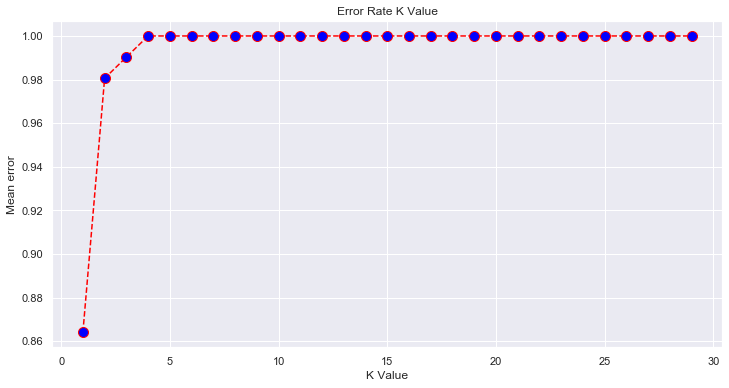

In [87]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [88]:
#k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [89]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using KNNR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using KNNR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.8902196318573777
Performance on testing data using KNNR: 0.8078817663272165
Accuracy KNNR:  0.8078817663272165
MSE:  0.20054457616295157


In [90]:
results.loc[15] = ['KNN Regressor', acc_K]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.887469
8,Random Forest Regressor k fold,0.901853
9,Gradient Boost Regres,0.892751
10,Gradient Boost Regres k fold,0.899283


### K fold cross validation

In [91]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7947547097467347
Standard Deviation:  0.03961462765692188


In [92]:
results.loc[16] = ['KNN Regressor k fold', accuracy]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.887469
8,Random Forest Regressor k fold,0.901853
9,Gradient Boost Regres,0.892751
10,Gradient Boost Regres k fold,0.899283


## Support Vector Regressor

In [93]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [94]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.7195312919938222
Performance on testing data using SVR: 0.6932035001931365
Accuracy SVR:  0.6932035001931365
MSE:  0.32025265299303374


In [95]:
results.loc[17] = ['Support Vector Regressor', acc_S]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.887469
8,Random Forest Regressor k fold,0.901853
9,Gradient Boost Regres,0.892751
10,Gradient Boost Regres k fold,0.899283


### K fold cross validation

In [96]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6971192327136142
Standard Deviation:  0.036742110058929286


In [97]:
results.loc[18] = ['Support Vector Regressor k fold', accuracy]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.887469
8,Random Forest Regressor k fold,0.901853
9,Gradient Boost Regres,0.892751
10,Gradient Boost Regres k fold,0.899283


## Ensemeble KNN Regressor, SVR, LR

In [98]:
#Multiple model Ensemble
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear') 

In [99]:
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False))],
                n_jobs=None, weights=None)

In [100]:
y_pred = evc.predict(X_test)
# performance on train data
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.8213604308836657
Performance on testing data using ensemble: 0.7849191766894733
Accuracy ensemble:  0.7849191766894733
MSE:  0.22451430937603264


In [101]:
results.loc[19] = ['Ensemble', acc_E]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.887469
8,Random Forest Regressor k fold,0.901853
9,Gradient Boost Regres,0.892751
10,Gradient Boost Regres k fold,0.899283


### K fold cross validation

In [102]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(evc,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7803291490734494
Standard Deviation:  0.029918532582796697


In [103]:
results.loc[20] = ['Ensemble k fold', accuracy]
results

,Method,accuracy
1,Decision Tree,0.843226
2,Decision Tree k fold,0.860196
3,Decision Tree 2,0.842728
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.887469
8,Random Forest Regressor k fold,0.901853
9,Gradient Boost Regres,0.892751
10,Gradient Boost Regres k fold,0.899283


* After applying all the models we can see that Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold, Bagging Regressor are giving better results as compared to other models.
* Now as the dataset have different gaussians, we can apply k means clustering and then we can apply the models and compare the accuracy.

##  c. Model performance range at 95% confidence level

## Bootstrap Sampling

In [104]:
concrete_XY = X.join(y)
concrete_XY.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.625902,-0.847144,1.060879,-1.091166,-0.014398,-0.305676,-0.153159,-0.355018
1,-1.074790,-0.363717,1.096078,-1.134020,0.881615,1.388141,0.300692,-0.656933,-0.737108
2,-0.298384,-0.858192,0.648965,0.279067,-0.086509,-0.206121,1.126981,-0.153159,-0.395144
3,-0.145209,0.477594,-0.847144,2.250592,-1.091166,-0.526517,-1.303578,-0.153159,0.600806
4,-1.209776,1.290784,-0.847144,0.565570,0.571085,0.958372,-0.964165,-0.153159,-1.049727


In [105]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

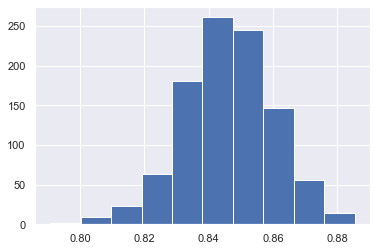

95.0 confidence interval 81.6% and 87.3%


In [106]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## Using Random Forest Regressor

In [107]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

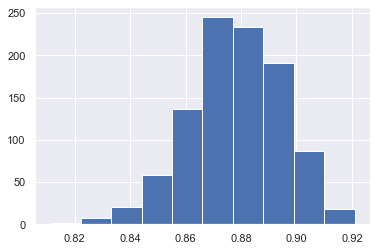

95.0 confidence interval 84.3% and 90.7%


In [108]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

The bootstrap random forest  classification model performance at 95% confidence level is between 84.3%-90.7% which is better than other classification algorithms.